In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd

## Q6

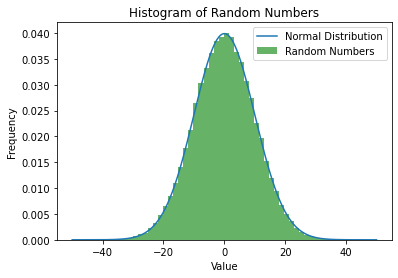

Minimum and Maximum value of the wavevector k is  -0.5  and  0.49999000000000005  respectively.


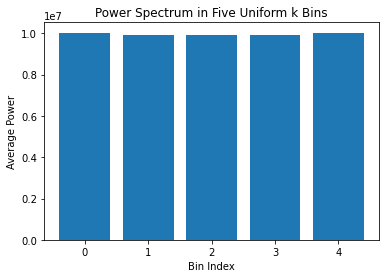

Short verbal argument for correctness:
The plot is correct because it accurately reflects the distribution of power across different frequency ranges in the dataset. This is achieved through the Fourier transform, which decomposes the signal into its constituent frequencies, and by dividing the frequency domain into uniform bins, allowing for a structured analysis of power distribution.


In [105]:
sample_size = 100000
mean = 0
std_dev = 10
random_numbers = np.random.normal(mean, std_dev, sample_size)

plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='g')
plt.title('Histogram of Random Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')


x = np.linspace(-50, 50, 1000)
y = 1/(std_dev * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std_dev**2) )
plt.plot(x, y)
plt.legend(['Normal Distribution', 'Random Numbers'])
plt.show()


fft_vals = fft(random_numbers)
power_spectrum = np.abs(fft_vals)**2

# Minimum and Maximum values of wavevector k
n = len(random_numbers)
sampling_frequency = 1  # Assume unit sampling frequency
k_values = fftfreq(n, d=1/sampling_frequency)
min_k = min(k_values)
max_k = max(k_values)
print("Minimum and Maximum value of the wavevector k is ",min_k," and ", max_k," respectively.")


num_bins = 5
bins = np.linspace(min_k, max_k, num_bins + 1)
avg_power_spectrum = []

for i in range(num_bins):
    mask = (k_values >= bins[i]) & (k_values <= bins[i+1])
    avg_power_spectrum.append(np.mean(power_spectrum[mask]))

plt.bar(range(num_bins), avg_power_spectrum)
plt.title('Power Spectrum in Five Uniform k Bins')
plt.xlabel('Bin Index')
plt.ylabel('Average Power')
plt.show()

print("Short verbal argument for correctness:")
print("The plot is correct because it accurately reflects the distribution of power across different frequency ranges in the dataset. This is achieved through the Fourier transform, which decomposes the signal into its constituent frequencies, and by dividing the frequency domain into uniform bins, allowing for a structured analysis of power distribution.")

## Q10

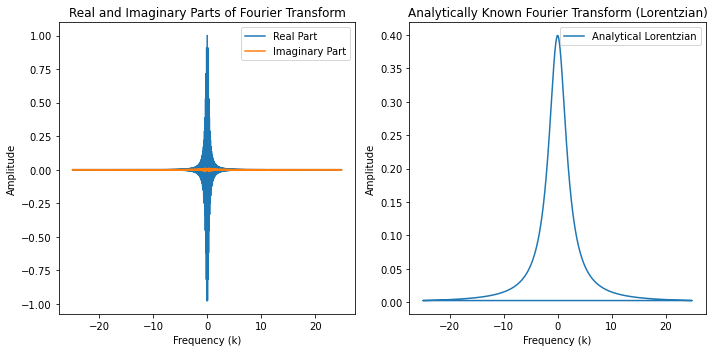

In [106]:
def f(x):
    return np.exp(-2 * np.abs(x))

x = np.linspace(-10, 10, 1000)
dx = x[1] - x[0]

f_transform = fft(f(x)) * dx

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fftfreq(len(x), dx), np.real(f_transform), label='Real Part')
plt.plot(fftfreq(len(x), dx), np.imag(f_transform), label='Imaginary Part')
plt.title('Real and Imaginary Parts of Fourier Transform')
plt.xlabel('Frequency (k)')
plt.ylabel('Amplitude')
plt.legend()

def lorentzian(k):
    return np.sqrt(8 / np.pi) / (k**2 + 4)

plt.subplot(1, 2, 2)
plt.plot(fftfreq(len(x), dx), lorentzian(fftfreq(len(x), dx)), label='Analytical Lorentzian')
plt.title('Analytically Known Fourier Transform (Lorentzian)')
plt.xlabel('Frequency (k)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

## Q5

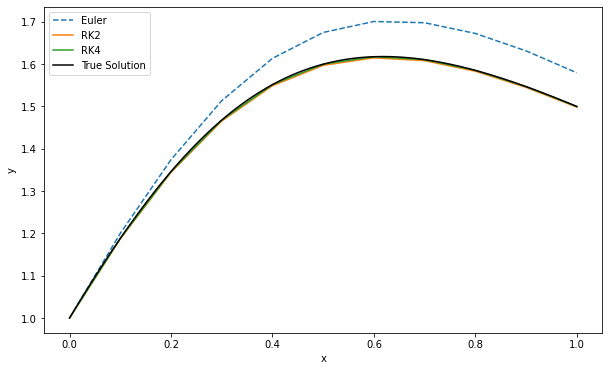

Tabulate the relative error:
-------------------------------
      x  Euler Method (%)  RK2 Method(%)  RK4 Method(%)
0   0.0          0.000000       0.000000       0.000000
1   0.1          1.000000       0.083333       0.000004
2   0.2          2.087694       0.133754       0.000018
3   0.3          3.121430       0.160973       0.000039
4   0.4          4.005076       0.171647       0.000062
5   0.5          4.686510       0.170878       0.000083
6   0.6          5.151826       0.162666       0.000100
7   0.7          5.414849       0.150060       0.000110
8   0.8          5.505355       0.135269       0.000115
9   0.9          5.459141       0.119802       0.000116
10  1.0          5.311299       0.104621       0.000113


In [107]:
def f(x, y):
    return (2 - 2*x*y) / (x**2 + 1)

def true_solution(x):
    return (2*x + 1) / (x**2 + 1)

# Euler's method
def euler(f, x0, y0, h, xmax):
    x_values = [x0]
    y_values = [y0]
    while x_values[-1] < xmax-h:
        x_new = x_values[-1] + h
        y_new = y_values[-1] + h * f(x_values[-1], y_values[-1])
        x_values.append(x_new)
        y_values.append(y_new)
    return np.array(x_values), np.array(y_values)

# Second-Order Runge-Kutta (RK2)
def rk2(f, x0, y0, h, xmax):
    x_values = [x0]
    y_values = [y0]
    while x_values[-1] < xmax-h:
        x_new = x_values[-1] + h
        k1 = h * f(x_values[-1], y_values[-1])
        k2 = h * f(x_values[-1] + h, y_values[-1] + k1)
        y_new = y_values[-1] + 0.5 * (k1 + k2)
        x_values.append(x_new)
        y_values.append(y_new)
    return np.array(x_values), np.array(y_values)

# Fourth-Order Runge-Kutta (RK4)
def rk4(f, x0, y0, h, xmax):
    x_values = [x0]
    y_values = [y0]
    while x_values[-1] < xmax-h:
        x_new = x_values[-1] + h
        k1 = h * f(x_values[-1], y_values[-1])
        k2 = h * f(x_values[-1] + 0.5*h, y_values[-1] + 0.5*k1)
        k3 = h * f(x_values[-1] + 0.5*h, y_values[-1] + 0.5*k2)
        k4 = h * f(x_values[-1] + h, y_values[-1] + k3)
        y_new = y_values[-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_values.append(x_new)
        y_values.append(y_new)
    return np.array(x_values), np.array(y_values)

# Step size and range
h = 0.1
x0 = 0
y0 = 1
xmax = 1

# Compute solutions
x_euler, y_euler = euler(f, x0, y0, h, xmax)
x_rk2, y_rk2 = rk2(f, x0, y0, h, xmax)
x_rk4, y_rk4 = rk4(f, x0, y0, h, xmax)

# True solution
x_true = np.linspace(0, 1, 1000)
y_true = true_solution(x_true)

plt.figure(figsize=(10, 6))
plt.plot(x_euler, y_euler,"--", label='Euler')
plt.plot(x_rk2, y_rk2,label='RK2')
plt.plot(x_rk4, y_rk4, label='RK4')
plt.plot(x_true, y_true, label='True Solution', color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Compute relative error in computed solution
relative_error_euler = np.abs((y_euler[:] - true_solution(x_euler[:])) / true_solution(x_euler[:])) * 100
relative_error_rk2 = np.abs((y_rk2[:] - true_solution(x_rk2[:])) / true_solution(x_rk2[:])) * 100
relative_error_rk4 = np.abs((y_rk4[:] - true_solution(x_rk4[:])) / true_solution(x_rk4[:])) * 100

# Tabulate the results
results = pd.DataFrame({
    'x': x_euler[:],
    'Euler Method (%)': relative_error_euler,
    'RK2 Method(%)': relative_error_rk2,
    'RK4 Method(%)': relative_error_rk4
})

print("Tabulate the relative error:")
print("-------------------------------")
print(results)